# <font style="color:#008fff;">Machine Learning Modeling</font>
<hr>

In [7]:
import pandas as pd
import numpy as np
import time
import os
import sklearn
import warnings
import sys
import random
import pickle

#Disabling Warnings
warnings.filterwarnings('ignore')

# to make this notebook's output stable across runs
random.seed(42)

## <font style="color:#008fff;">Reading in preprocessed dataset</font>

In [5]:
def loadDataset(file_name, idx_col=False):
    start_time= time.time()
    if idx_col:
        df = pd.read_csv(file_name, index_col=[0])
    else:
        df = pd.read_csv(file_name)
    print("***Elapsed time to read csv files --- %s seconds ---***" % (time.time() - start_time))
    return df


df_train_preprocessed = loadDataset("Dataset/preprocessed_training_data.csv")

***Elapsed time to read csv files --- 0.08219504356384277 seconds ---***


In [6]:
df_train_preprocessed.head(10)

,url_vect,is_gov_tld,who_is,https,profanity_score_prob,url_len_scaled,js_len_scaled,js_obf_len_scaled,label
0,0.044,0,0,0,0.901780,0.152542,0.842993,0.663632,1
1,0.005,0,1,1,0.001813,0.593220,0.097764,0.000000,0
2,0.033,0,0,0,0.965517,0.864407,0.727081,0.471829,1
3,0.046,0,1,1,0.049674,0.271186,0.038052,0.000000,0
4,0.046,0,0,0,0.955261,0.525424,0.600632,0.421721,1
5,0.017,0,1,1,0.006906,0.745763,0.155719,0.000000,0
6,0.046,0,0,0,0.925228,0.186441,0.492097,0.240813,1
7,0.524,0,0,0,0.989416,0.237288,0.393045,0.000000,1
8,0.046,0,0,0,0.896943,0.254237,0.715490,0.319687,1
9,0.046,0,0,1,0.007933,0.271186,0.128205,0.000000,0


### Split our dataset into X_train and y_train

In [4]:
X_train = df_train_preprocessed.drop('label', axis=1)
y_train = df_train_preprocessed['label']

In [5]:
X_train.shape, y_train.shape

((54506, 8), (54506,))

## <font style="color:#008fff;">Feature Selection</font>

There are a handful of feature selection methods in Scikit-Learn with classification. According to Sklearn's documentation, common feature selection algorithms include `chi2`, `f_classif`, and `mutual_info_classif` (https://scikit-learn.org/stable/modules/feature_selection.html)
 - We will try out the 3 we see in this documentation to see which features are most commonly chosen

**Other Potential Feature Selection methods to experiment in the future: Mean Absolute Difference, Fisher Score, different method from scratch**

In [6]:
# Importing feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

### Feature selection using Sklearn's chi-squared:

In [7]:
# Taking the top 5 most best descriptive features using chi-squared testing
chi2_selector = SelectKBest(chi2, k=5)
X_kbest_chi2 = chi2_selector.fit_transform(X_train, y_train)

print(f'Out of {X_train.shape[1]} features in our original dataset, we get the top {X_kbest_chi2.shape[1]} chosen by chi2')

# Showing which columns chi2 has chosen
selected_features_chi2 = chi2_selector.get_support(indices=True)
print(f'Top 5 features selected using chi-squared: {list(X_train.iloc[:, selected_features_chi2].columns)}')

Out of 8 features in our original dataset, we get the top 5 chosen by chi2
Top 5 features selected using chi-squared: ['who_is', 'https', 'profanity_score_prob', 'js_len_scaled', 'js_obf_len_scaled']


### Feature selection using Sklearn's f_classif

In [8]:
# Taking the top 5 best descriptive feature using f classification
f_classif_selector = SelectKBest(f_classif, k=5)
X_kbest_f_classif = f_classif_selector.fit_transform(X_train, y_train)

print(f'Out of {X_train.shape[1]} features in our original dataset, we get the top {X_kbest_f_classif.shape[1]} chosen by f_classif')

# Showing which columns f_classif has chosen
selected_features_f_classif = f_classif_selector.get_support(indices=True)
print(f'Top 5 features selected using f_classif: {list(X_train.iloc[:, selected_features_f_classif].columns)}')

Out of 8 features in our original dataset, we get the top 5 chosen by f_classif
Top 5 features selected using f_classif: ['who_is', 'https', 'profanity_score_prob', 'js_len_scaled', 'js_obf_len_scaled']


### Feature selection using Sklearn's mutual_info_classif

In [9]:
# Taking the top 5 best descriptive feature using mutual info classif
MIC_selector = SelectKBest(mutual_info_classif, k=5)
X_kbest_MIC = MIC_selector.fit_transform(X_train, y_train)

print(f'Out of {X_train.shape[1]} features in our original dataset, we get the top {X_kbest_MIC.shape[1]} chosen by mutual_info_classif')

# Showing which columns f_classif has chosen
selected_features_MIC = MIC_selector.get_support(indices=True)
print(f'Top 5 features selected using f_classif: {list(X_train.iloc[:, selected_features_MIC].columns)}')

Out of 8 features in our original dataset, we get the top 5 chosen by mutual_info_classif
Top 5 features selected using f_classif: ['who_is', 'https', 'profanity_score_prob', 'js_len_scaled', 'js_obf_len_scaled']


### It seems that all 3 methods from scikit-learn all chose 'who_is', 'https', 'profanity_score_prob', 'js_len_scaled',  and 'js_obf_len_scaled' as their top 5 features. We will be using this for now.

In [10]:
X_kbest_features_train = X_kbest_chi2
X_kbest_features_train

array([[0.00000000e+00, 0.00000000e+00, 9.01780298e-01, 8.42992624e-01,
        6.63632491e-01],
       [1.00000000e+00, 1.00000000e+00, 1.81264953e-03, 9.77637279e-02,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.65517263e-01, 7.27081138e-01,
        4.71829249e-01],
       ...,
       [1.00000000e+00, 1.00000000e+00, 7.20261896e-04, 4.27350427e-02,
        0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 9.36110254e-03, 2.19529329e-01,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.72637009e-01, 4.19388830e-01,
        1.96309665e-01]])

## <font style="color:#008fff;">ML Modeling: K-Nearest Neighbors</font>

### Building KNN Model for the FULL feature set (X_train):

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn_full = KNeighborsClassifier(n_neighbors=3)
knn_full.fit(X_train.values, y_train.values)

KNeighborsClassifier(n_neighbors=3)

In [12]:
# Save the model to disk
knn_full_filename = 'Models/knn_full_features.sav'
pickle.dump(knn_full, open(knn_full_filename, 'wb'))

### Building KNN Model for the feature set after FEATURE SELECTION (X_kbest_features_train):

In [13]:
# KNN with reduced features
knn_reduced = KNeighborsClassifier(n_neighbors=3)
knn_reduced.fit(X_kbest_features_train, y_train.values)

KNeighborsClassifier(n_neighbors=3)

In [14]:
# Save the model to disk
knn_reduced_filename = 'Models/knn_reduced_features.sav'
pickle.dump(knn_reduced, open(knn_reduced_filename, 'wb'))

## <font style="color:#008fff;">ML Modeling: (Gaussian) Naive Bayes</font>

### Building Naive Bayes Model for the FULL feature set:

In [15]:
from sklearn.naive_bayes import GaussianNB

gnb_full = GaussianNB()
gnb_full.fit(X_train.values, y_train.values)

GaussianNB()

In [16]:
# Save the model to disk
gnb_full_filename = 'Models/gnb_full_features.sav'
pickle.dump(gnb_full, open(gnb_full_filename, 'wb'))

### Building Naive Bayes Model for the feature set after FEATURE SELECTION:

In [17]:
gnb_reduced = GaussianNB()
gnb_reduced.fit(X_kbest_features_train, y_train.values)

GaussianNB()

In [18]:
# Save the model to disk
gnb_reduced_filename = 'Models/gnb_reduced_features.sav'
pickle.dump(gnb_reduced, open(gnb_reduced_filename, 'wb'))

## <font style="color:#008fff;">ML Modeling: Decision Tree</font> 

### Building Decision Tree Model for the FULL feature set:

In [19]:
from sklearn.tree import DecisionTreeClassifier
dc_full = DecisionTreeClassifier(max_depth=3)
dc_full.fit(X_train.values, y_train.values)

DecisionTreeClassifier(max_depth=3)

In [20]:
#Save the model to disk
dc_full_filename = 'Models/dc_full_features.sav'
pickle.dump(dc_full, open(dc_full_filename, 'wb'))

### Building Random Forest Model for feature set after FEATURE SELECTION

In [22]:
dc_reduced = DecisionTreeClassifier(max_depth=3)
dc_reduced.fit(X_kbest_features_train, y_train.values)

DecisionTreeClassifier(max_depth=3)

In [23]:
#Save the model to disk
dc_reduced_filename = 'Models/dc_reduced_features.sav'
pickle.dump(dc_reduced, open(dc_reduced_filename, 'wb'))

## <font style="color:#008fff;">ML Modeling: Random Forest</font> 

### Building Random Forest Model for the FULL feature set:

In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc_full = RandomForestClassifier(n_estimators=100, random_state=100) #Random_state is a seeded value and n_estimators are the n amount of trees
rfc_full.fit(X_train.values, y_train.values)

RandomForestClassifier(random_state=100)

In [25]:
#Save the model to disk
rfc_full_filename = 'Models/rfc_full_features.sav'
pickle.dump(rfc_full, open(rfc_full_filename, 'wb'))

### Building Random Forest Model for feature set after FEATURE SELECTION

In [26]:
rfc_reduced = RandomForestClassifier(n_estimators=100, random_state=100) #Random_state is a seeded value and n_estimators are the n amount of trees
rfc_reduced.fit(X_kbest_features_train, y_train.values)

RandomForestClassifier(random_state=100)

In [27]:
#Save the model to disk
rfc_reduced_filename = 'Models/rfc_reduced_features.sav'
pickle.dump(rfc_reduced, open(rfc_reduced_filename, 'wb'))

## <font style="color:#008fff;">Preprocess Testing Data to Fit Into Our ML Models</font>

In [29]:
from profanity_check import predict_prob, predict
from urllib.parse import urlparse
from tld import get_tld

# Getting rid of outliers using clamp transformation
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    
    for index, val in df.iteritems():
        if val < (q1 - 1.5 * IQR): # Small outliers below lower quartile
            df[index] = (q1 - 1.5 * IQR)
        elif val > (q3 + 1.5 * IQR): # Large outliers above upper quartile
            df[index] = (q3 + 1.5 * IQR)

    return df

# If tld == gov, then is_gov_tld = 1, else gov_tld = 0
def make_gov_column(df):
    gov_col = []
    for index, val in df.iteritems():
        if val == 'gov':
            gov_col.append(1)
        else:
            gov_col.append(0)
    return np.array(gov_col)


def clean_url(url):
    url_text=""
    try:
        domain = get_tld(url, as_object=True)
        domain = get_tld(url, as_object=True)
        url_parsed = urlparse(url)
        url_text= url_parsed.netloc.replace(domain.tld," ").replace('www',' ') +" "+ url_parsed.path+" "+url_parsed.params+" "+url_parsed.query+" "+url_parsed.fragment
        url_text = url_text.translate(str.maketrans({'?':' ','\\':' ','.':' ',';':' ','/':' ','\'':' '}))
        url_text.strip(' ')
        url_text.lower()
    except:
        url_text = url_text.translate(str.maketrans({'?':' ','\\':' ','.':' ',';':' ','/':' ','\'':' '}))
        url_text.strip(' ')
    return url_text

def predict_profanity(url_cleaned):
    arr=predict_prob(url_cleaned.astype(str).to_numpy())
    arr= arr.round(decimals=3)
    #df['url_vect'] = pd.DataFrame(data=arr,columns=['url_vect'])
    return arr

In [79]:
def preprocess(df):
    start_time= time.time()

    # ------------ Address outliers via clamp transformation --------------
    url_len_clamped = df['url_len'].copy()
    url_len_clamped = find_outliers_IQR(url_len_clamped)
    js_len_clamped = df['js_len'].copy()
    js_len_clamped = find_outliers_IQR(js_len_clamped)
    js_obf_len_clamped = df['js_obf_len'].copy()
    js_obf_len_clamped = find_outliers_IQR(js_obf_len_clamped)
    
    df['url_len'] = url_len_clamped
    df['js_len'] = js_len_clamped
    df['js_obf_len'] = js_obf_len_clamped
    
    # --------------- Scaling numerical features ---------------
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    
    url_len_scaled = scaler.fit_transform(df[['url_len']])
    df['url_len_scaled'] = url_len_scaled

    js_len_scaled = scaler.fit_transform(df[['js_len']])
    df['js_len_scaled'] = js_len_scaled

    js_obf_len_scaled = scaler.fit_transform(df[['js_obf_len']])
    df['js_obf_len_scaled'] = js_obf_len_scaled
    
    
    # ---------------- Binary Encoding for Categorical Attributes ------------------
    identifyWho_Is = {'incomplete': 0, 'complete': 1}
    df['who_is'] = [identifyWho_Is[item] for item in df.who_is]
    
    identifyHTTPS = {'no': 0, 'yes': 1}
    df.https = [identifyHTTPS[item] for item in df.https]
    
    # --------------- Handling TLD Column -------------------------
    gov_binary_val = make_gov_column(df['tld'])
    df.insert(2, column = "is_gov_tld", value=gov_binary_val)
    
    
    # ---------------- Probabilty based profanity score on text columnsk ------------------
    from profanity_check import predict_prob, predict
    profanity_score_prob = predict_prob(np.array(df['content']))
    df.insert(5, column='profanity_score_prob', value=profanity_score_prob)
    
    
    # ------------------ Cleaning URL's --------------------
    url_cleaned = df['url'].map(clean_url)
    df.insert(1, column='url_cleaned', value=url_cleaned)
    url_vect = predict_profanity(df['url_cleaned'])
    df.insert(2, column='url_vect', value=url_vect)
    
    # ---------------------- Preprocess labels into binary values ----------------------
    identifyLabels = {'bad': 1, 'good': 0}
    df['label'] = [identifyLabels[item] for item  in df.label]
    
    # ------------ Drop Unecessary Columns, or Original Columns after preprocessing that still remain -------------
    df.drop(['geo_loc', 'ip_add', 'url_len', 'js_len', 'js_obf_len', 'tld', 'content', 'url', 'url_cleaned'], axis=1, inplace=True)
    
    # ---------------------- Rearrange Columns ----------------------
    titles = ['url_vect', 'is_gov_tld', 'who_is', 'https', 'profanity_score_prob', 
              'url_len_scaled', 'js_len_scaled','js_obf_len_scaled',
              'label'] # Same order as our training data

    df = df[titles] 
    
    print("***Elapsed time preprocess --- %s seconds ---***" % (time.time() - start_time))
    return df

In [95]:
df_test = loadDataset("Dataset/Webpages_Classification_test_data.csv", idx_col=True)

***Elapsed time to read csv files --- 17.733562469482422 seconds ---***


In [96]:
df_test.shape

(361934, 11)

### NOTE: Our current training dataset has 54,506 columns when running df_train_preprocessed.shape. But, our test dataset has 361,934 when running df_test.shape. We plan to make our training split be 80% and testing split be 20%. Therefore, we can reduce our test split by sampling ~13,627 rows to make the size of our testing data proportional to test data

In [98]:
# Doing the math to see if our calculations were correct
training_num = 54506 # Rows training data has
testing_num = 13627 # Columns testing data is planned to be sampled to out of 361,934
total = training_num + testing_num

print(f'Training {training_num/total}')
print(f'Testing {testing_num/total}')

Training 0.7999941291297903
Testing 0.20000587087020974


In [107]:
df_test_sampled = df_test.head(13627) # Sampling our test set

In [108]:
df_test_preprocessed = preprocess(df_test_sampled)

***Elapsed time preprocess --- 5.183773517608643 seconds ---***


In [155]:
# Saving preprocessed testing dataset into disk
df_test_preprocessed.to_csv('Dataset/preprocessed_testing_data.csv', index=False)

## <font style="color:#008fff;">Performance Evaluation of Each ML Model</font>
 - Apply 4 or more performance metrics to analyze the results
 - Include 3 or more visualization techniques for presenting the results
 - Compare and analyze all the ML models that you have built for the project and present the performance analysis

In [9]:
# Splitting our test dataset into X and y
X_test = pd.read_csv('Dataset/preprocessed_testing_data.csv').drop('label', axis=1)
y_test = pd.read_csv('Dataset/preprocessed_testing_data.csv')['label']

# X_test, but only with columns we've chosen during feature selection
chosen_features = ['who_is', 'https', 'profanity_score_prob', 'js_len_scaled', 'js_obf_len_scaled']
X_kbest_features_test = X_test[chosen_features].values

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score, RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt

### Loading all of our currently saved machine learning models from disk

In [42]:
# ---------------------- KNN ----------------------
knn_full_filename = 'Models/knn_full_features.sav' # Full feature set
knn_full = pickle.load(open(knn_full_filename, 'rb'))

knn_reduced_filename = 'Models/knn_reduced_features.sav' # Reduced feature set
knn_reduced = pickle.load(open(knn_reduced_filename, 'rb'))


# ---------------------- Naive Bayes ----------------------
gnb_full_filename = 'Models/gnb_full_features.sav'
gnb_full = pickle.load(open(gnb_full_filename, 'rb'))

gnb_reduced_filename = 'Models/gnb_reduced_features.sav'
gnb_reduced = pickle.load(open(gnb_reduced_filename, 'rb'))


# ---------------------- Decision Trees ----------------------
dc_full_filename = 'Models/dc_full_features.sav'
dc_full = pickle.load(open(dc_full_filename, 'rb'))

dc_reduced_filename = 'Models/dc_reduced_features.sav'
dc_reduced = pickle.load(open(dc_reduced_filename, 'rb'))


# ---------------------- Random Forest ----------------------
rfc_full_filename = 'Models/rfc_full_features.sav'
rfc_full = pickle.load(open(rfc_full_filename, 'rb'))

rfc_reduced_filename = 'Models/rfc_reduced_features.sav'
rfc_reduced = pickle.load(open(rfc_reduced_filename, 'rb'))

### Useful functions for evaluation/visualization:
 - Evaluation Scores we will be using: **Accuracy, Precision, Recall, F1-Score, AUC**

In [43]:
def draw_conf_matrix(actual, predicted, title):
    plt.figure(figsize = (7,5))
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    cf_matrix = confusion_matrix(actual, predicted)
    ht_mp = sns.heatmap(cf_matrix, annot=True, fmt='g')
    
    # **NOTE: In this case: Legitimate (NOT Malicious) is our NEGATIVE class, while Malicious is our POSITIVE class**
    ht_mp.set(xlabel='Predicted', ylabel='Actual', 
              xticklabels=['Not Malicious (Negative)', 'Malicious (Positive)'], 
              yticklabels=['Not Malicious (Negative)', 'Malicious (Positive)'])
        
def plot_show_auc(full_feat_pred, reduced_feat_pred, y_test, title):
    # calculate FPR and TPR for each model
    fpr_full_features, tpr_full_features, _ = roc_curve(y_test, full_feat_pred)
    fpr_reduced_features, tpr_reduced_features, _ = roc_curve(y_test, reduced_feat_pred)

    # create an empty figure
    fig, ax = plt.subplots()

    # create RocCurveDisplay object for each model
    roc_display_full_features = RocCurveDisplay(fpr=fpr_full_features, tpr=tpr_full_features, roc_auc=roc_auc_score(y_test, full_feat_pred), estimator_name='Full Features')
    roc_display_reduced_features = RocCurveDisplay(fpr=fpr_reduced_features, tpr=tpr_reduced_features, roc_auc=roc_auc_score(y_test, reduced_feat_pred), estimator_name='Reduced Features')

    # plot each RocCurveDisplay object on the same graph
    roc_display_full_features.plot(ax=ax)
    roc_display_reduced_features.plot(ax=ax)

    # add dashed red line representing random guessing
    ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')

    # re-add legend with new line
    ax.legend()

    # add axis labels and title
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)

### Evaluating KNN using full features

In [44]:
knn_full_predictions = knn_full.predict(X_test.values)

draw_conf_matrix(actual=y_test, predicted=knn_full_predictions, title="Confusion Matrix (KNN Full Dataset)")

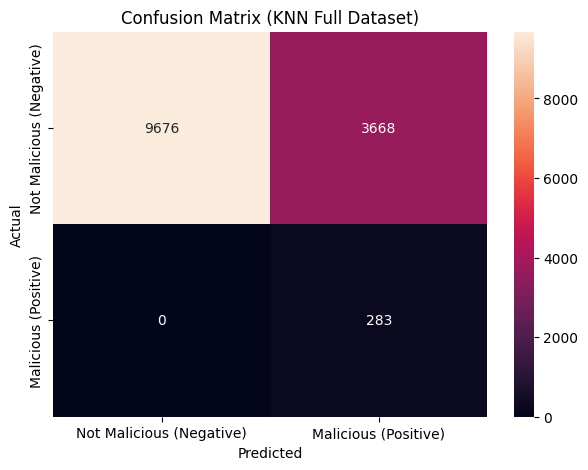

In [45]:
draw_conf_matrix(actual=y_test, predicted=knn_full_predictions, title="Confusion Matrix (KNN Full Dataset)")

In [46]:
print(classification_report(y_true=y_test, y_pred=knn_full_predictions))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84     13344
           1       0.07      1.00      0.13       283

    accuracy                           0.73     13627
   macro avg       0.54      0.86      0.49     13627
weighted avg       0.98      0.73      0.83     13627



### Evaluating KNN using feature reduction

In [47]:
knn_reduced_predictions = knn_reduced.predict(X_kbest_features_test)

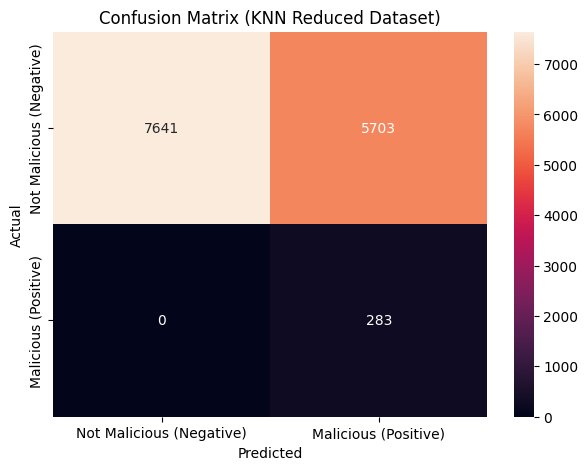

In [48]:
draw_conf_matrix(actual=y_test, predicted=knn_reduced_predictions, title="Confusion Matrix (KNN Reduced Dataset)")

In [49]:
print(classification_report(y_true=y_test, y_pred=knn_reduced_predictions))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73     13344
           1       0.05      1.00      0.09       283

    accuracy                           0.58     13627
   macro avg       0.52      0.79      0.41     13627
weighted avg       0.98      0.58      0.71     13627



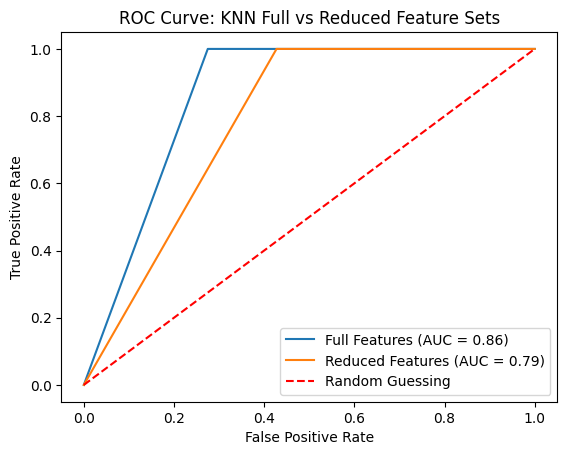

In [52]:
plot_show_auc(knn_full_predictions, knn_reduced_predictions, y_test, 'ROC Curve: KNN Full vs Reduced Feature Sets')

### Evaluating Naive Bayes using full features

In [56]:
gnb_full_predictions = gnb_full.predict(X_test.values)

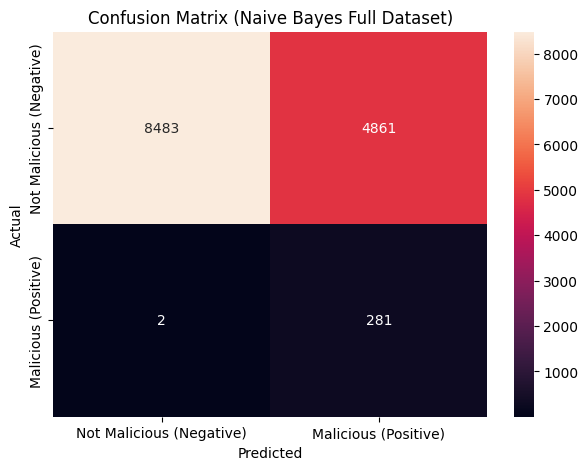

In [62]:
draw_conf_matrix(actual=y_test, predicted=gnb_full_predictions, title="Confusion Matrix (Naive Bayes Full Dataset)")

In [63]:
print(classification_report(y_true=y_test, y_pred=gnb_full_predictions))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78     13344
           1       0.05      0.99      0.10       283

    accuracy                           0.64     13627
   macro avg       0.53      0.81      0.44     13627
weighted avg       0.98      0.64      0.76     13627



### Evaluating Naive Bayes using feature selection

In [64]:
gnb_reduced_predictions = gnb_reduced.predict(X_kbest_features_test)

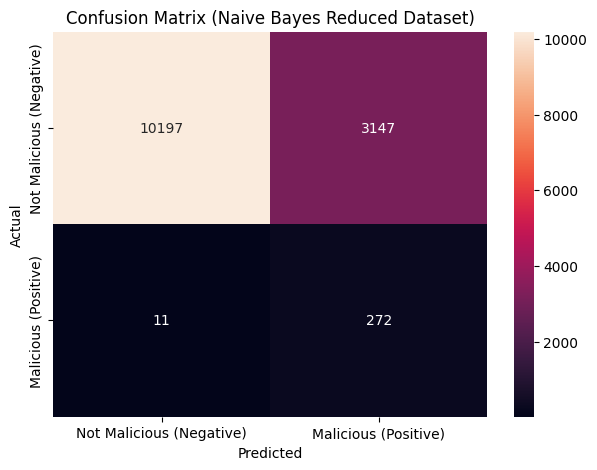

In [65]:
draw_conf_matrix(actual=y_test, predicted=gnb_reduced_predictions, title="Confusion Matrix (Naive Bayes Reduced Dataset)")

In [74]:
print(classification_report(y_true=y_test, y_pred=gnb_reduced_predictions))

              precision    recall  f1-score   support

           0       1.00      0.76      0.87     13344
           1       0.08      0.96      0.15       283

    accuracy                           0.77     13627
   macro avg       0.54      0.86      0.51     13627
weighted avg       0.98      0.77      0.85     13627



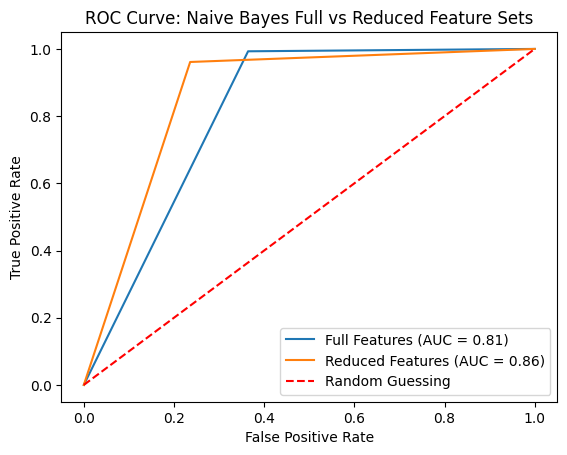

In [75]:
plot_show_auc(gnb_full_predictions, gnb_reduced_predictions, y_test, 'ROC Curve: Naive Bayes Full vs Reduced Feature Sets')

### Evaluating Decision Trees using full features

In [68]:
dc_full_predictions = dc_full.predict(X_test.values)

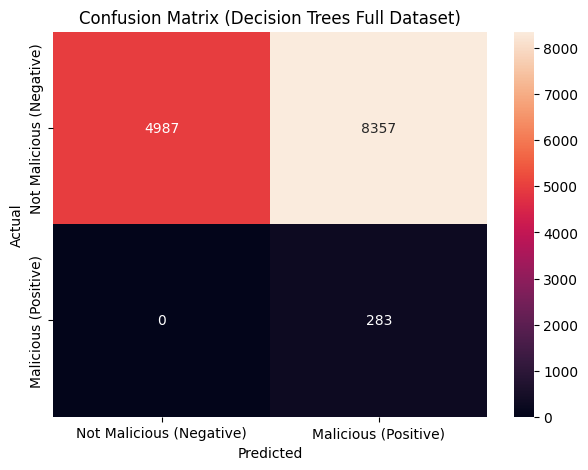

In [69]:
draw_conf_matrix(actual=y_test, predicted=dc_full_predictions, title="Confusion Matrix (Decision Trees Full Dataset)")

In [76]:
print(classification_report(y_true=y_test, y_pred=dc_full_predictions))

              precision    recall  f1-score   support

           0       1.00      0.37      0.54     13344
           1       0.03      1.00      0.06       283

    accuracy                           0.39     13627
   macro avg       0.52      0.69      0.30     13627
weighted avg       0.98      0.39      0.53     13627



### Evaluating Decision Trees using feature selection

In [77]:
dc_reduced_predictions = dc_reduced.predict(X_kbest_features_test)

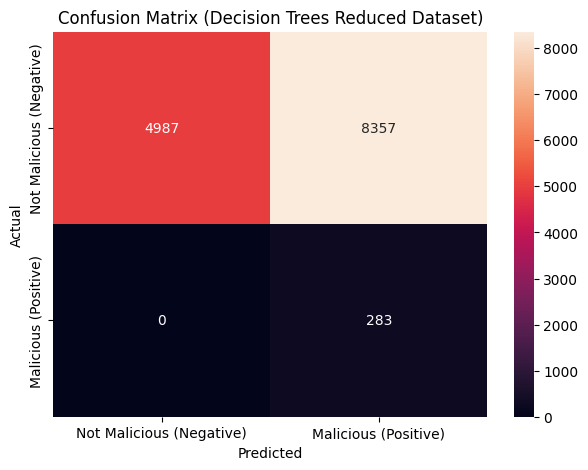

In [78]:
draw_conf_matrix(actual=y_test, predicted=dc_reduced_predictions, title="Confusion Matrix (Decision Trees Reduced Dataset)")

In [79]:
print(classification_report(y_true=y_test, y_pred=dc_reduced_predictions))

              precision    recall  f1-score   support

           0       1.00      0.37      0.54     13344
           1       0.03      1.00      0.06       283

    accuracy                           0.39     13627
   macro avg       0.52      0.69      0.30     13627
weighted avg       0.98      0.39      0.53     13627



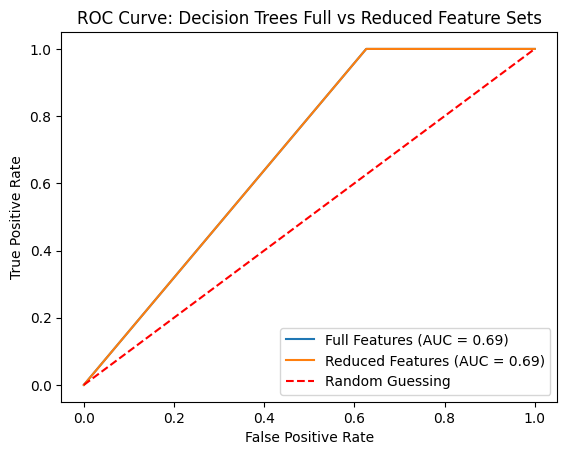

In [80]:
plot_show_auc(dc_full_predictions, dc_reduced_predictions, y_test, 'ROC Curve: Decision Trees Full vs Reduced Feature Sets')

### Evaluating Random Forest using full features

In [83]:
rfc_full_predictions = rfc_full.predict(X_test.values)

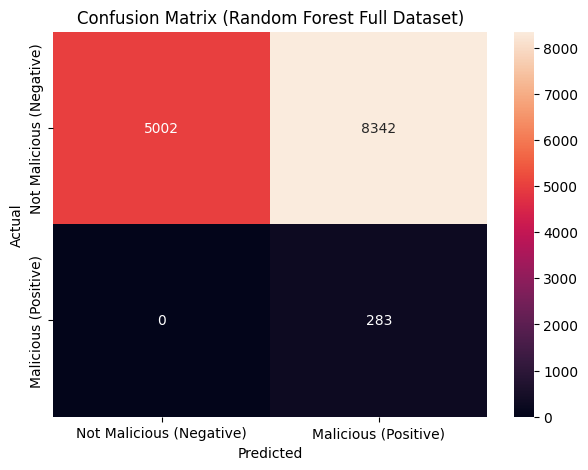

In [84]:
draw_conf_matrix(actual=y_test, predicted=rfc_full_predictions, title="Confusion Matrix (Random Forest Full Dataset)")

In [85]:
print(classification_report(y_true=y_test, y_pred=rfc_full_predictions))

              precision    recall  f1-score   support

           0       1.00      0.37      0.55     13344
           1       0.03      1.00      0.06       283

    accuracy                           0.39     13627
   macro avg       0.52      0.69      0.30     13627
weighted avg       0.98      0.39      0.54     13627



### Evaluating Random Forest using feature selection

In [87]:
rfc_reduced_predictions = rfc_reduced.predict(X_kbest_features_test)

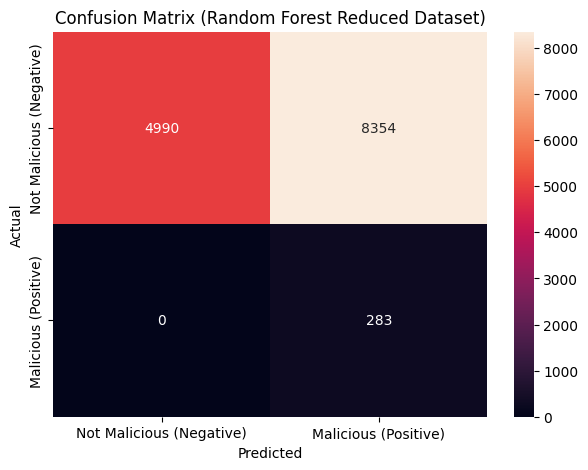

In [88]:
draw_conf_matrix(actual=y_test, predicted=rfc_reduced_predictions, title="Confusion Matrix (Random Forest Reduced Dataset)")

In [89]:
print(classification_report(y_true=y_test, y_pred=rfc_reduced_predictions))

              precision    recall  f1-score   support

           0       1.00      0.37      0.54     13344
           1       0.03      1.00      0.06       283

    accuracy                           0.39     13627
   macro avg       0.52      0.69      0.30     13627
weighted avg       0.98      0.39      0.53     13627



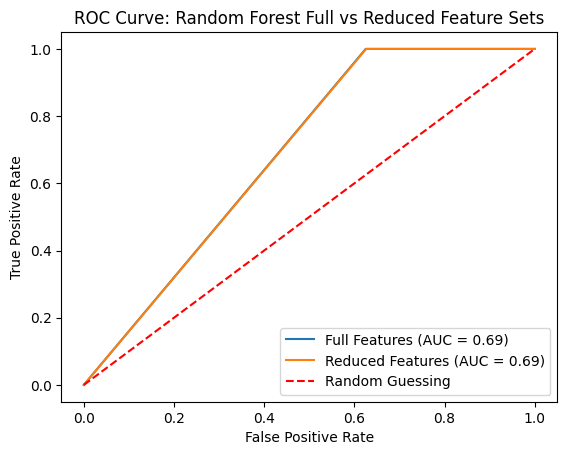

In [90]:
plot_show_auc(rfc_full_predictions, rfc_reduced_predictions, y_test, 'ROC Curve: Random Forest Full vs Reduced Feature Sets')